In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("SD03Q016\Diabetes Database.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.shape

(768, 9)

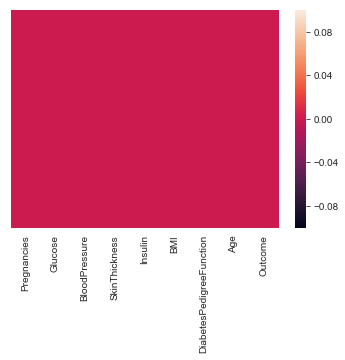

In [8]:
sns.heatmap(df.isnull(),yticklabels=False)

In [9]:
df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [11]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [12]:
preg_proportion = np.array(df['Pregnancies'].value_counts())
preg_month = np.array(df['Pregnancies'].value_counts().index)
preg_proportion_perc = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)


In [13]:
preg = pd.DataFrame({'month':preg_month,'count_of_preg_prop':preg_proportion,'percentage_proportion':preg_proportion_perc})
preg.set_index(['month'],inplace=True)
preg.head(10)

,count_of_preg_prop,percentage_proportion
month,,
1,135,17
0,111,14
2,103,13
3,75,9
4,68,8
5,57,7
6,50,6
7,45,5
8,38,4


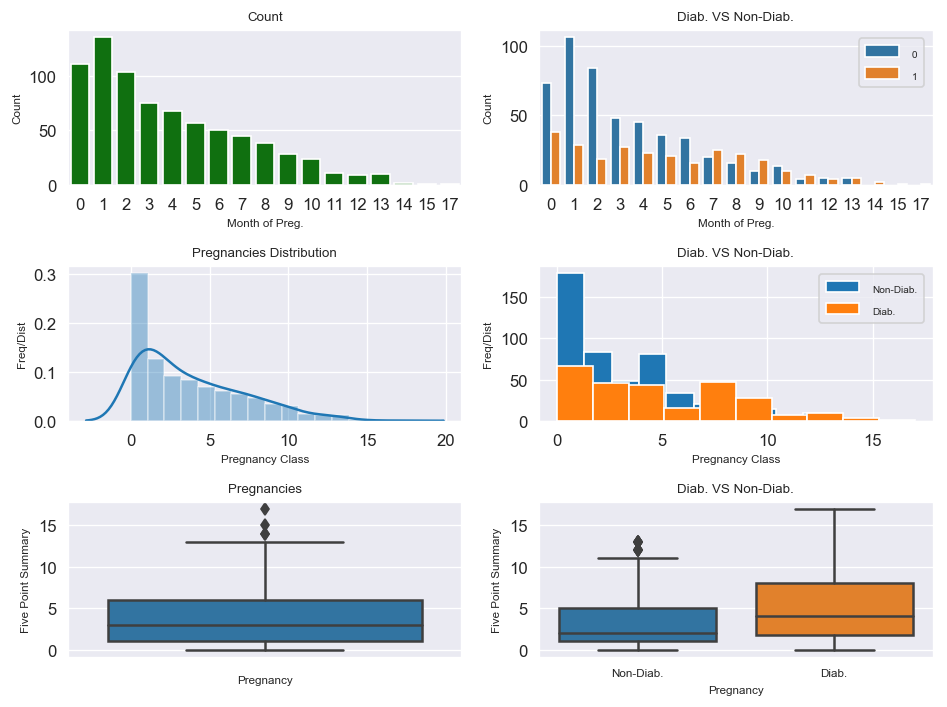

In [14]:
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.countplot('Pregnancies',data=df,ax=axes[0][0],color='green')
axes[0][0].set_title('Count',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.countplot('Pregnancies',data=df,hue='Outcome',ax=axes[0][1])
axes[0][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10 = sns.distplot(df['Pregnancies'],ax=axes[1][0])
axes[1][0].set_title('Pregnancies Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot11 = df[df['Outcome']==False]['Pregnancies'].plot.hist(ax=axes[1][1],label='Non-Diab.')
plot11_2=df[df['Outcome']==True]['Pregnancies'].plot.hist(ax=axes[1][1],label='Diab.')
axes[1][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plot11.axes.legend(loc=1)
plt.setp(axes[1][1].get_legend().get_texts(), fontsize='6') # for legend text
plt.setp(axes[1][1].get_legend().get_title(), fontsize='6') # for legend title
plt.tight_layout()

plot20 = sns.boxplot(df['Pregnancies'],ax=axes[2][0],orient='v')
axes[2][0].set_title('Pregnancies',fontdict={'fontsize':8})
axes[2][0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=axes[2][1])
axes[2][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[2][1].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
plt.tight_layout()
plt.show()
